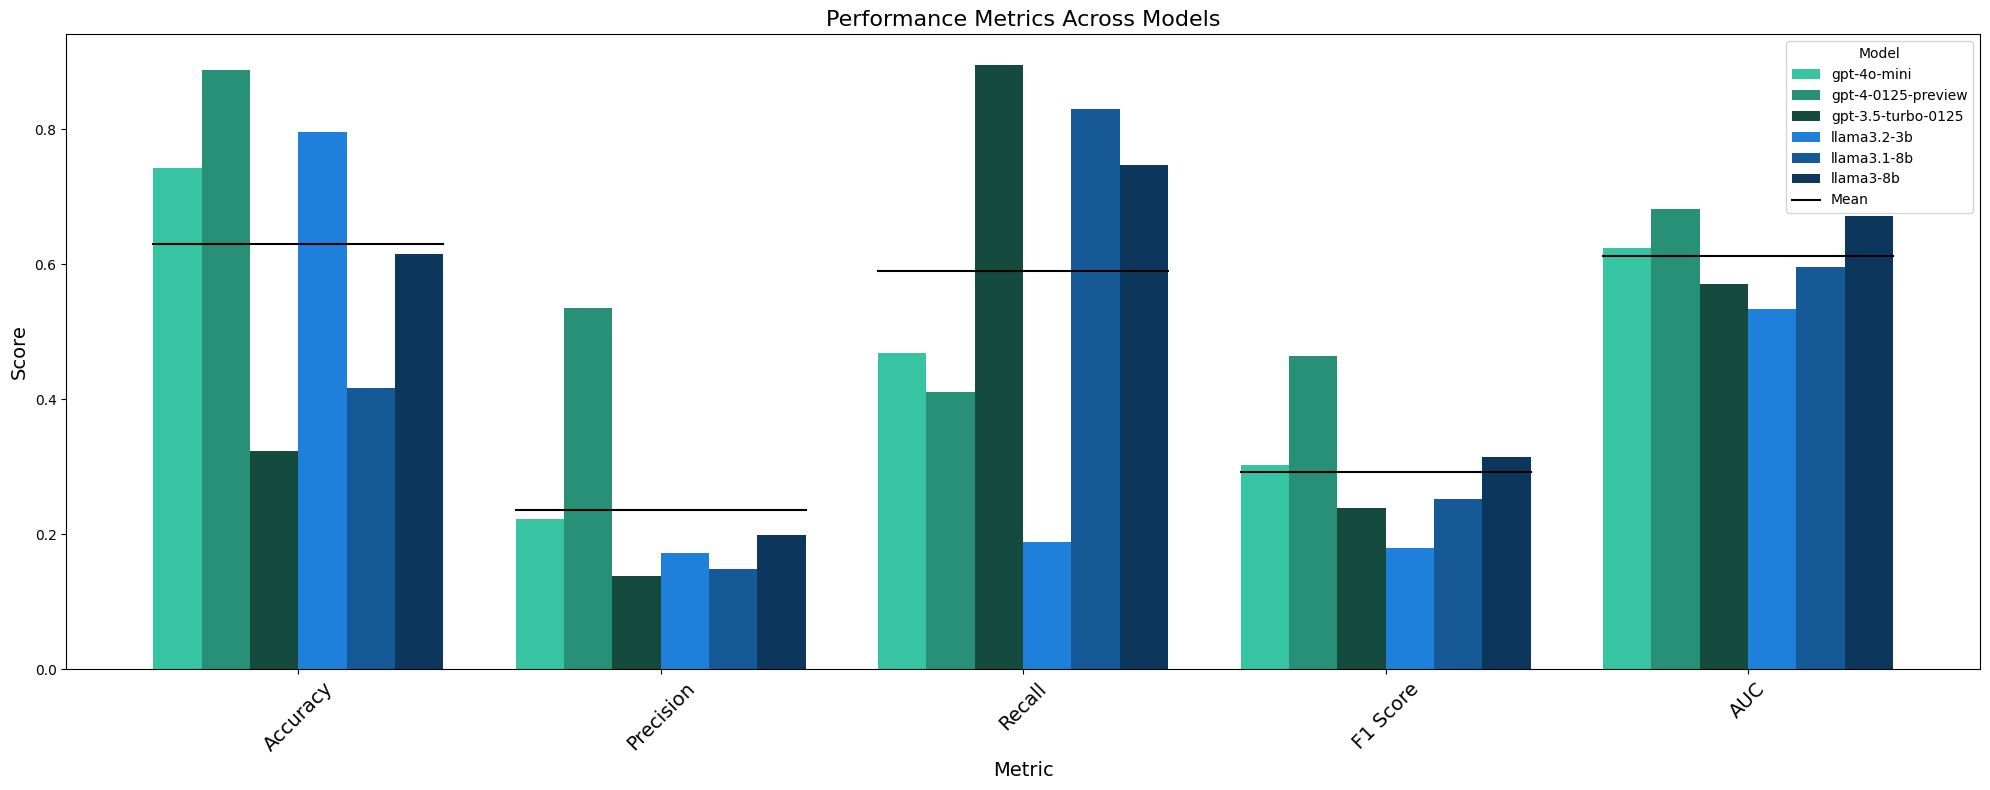

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load your CSV
df = pd.read_csv("./data/result/MASTER.csv")

# Initialize results list
results = []

# Loop through LLM model columns
model_columns = ["gpt-4o-mini", "gpt-4-0125-preview", "gpt-3.5-turbo-0125", 
                 "llama3.2-3b", "llama3.1-8b", "llama3-8b"]

for model in model_columns:
    # Cast SEXISM to int
    y_true = df['SEXISM'].astype(float).astype(int)
    df[model] = pd.to_numeric(df[model], errors='coerce').fillna(0).astype(int)  # Clean model column
    y_pred = df[model]

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_pred)

    # Append results
    results.append({
        "Model": model,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Melt the DataFrame for easier visualization
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Calculate the mean for each metric

mean_scores = results_melted.groupby("Metric")["Score"].mean()

plot_order = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]
mean_scores = mean_scores.reindex(plot_order)

# Define custom colors for the models
palette = {
    "gpt-4o-mini": "#1FDCB0",
    "gpt-4-0125-preview": "#16A180",
    "gpt-3.5-turbo-0125": "#0C5443",
    "llama3.2-3b": "#0081FB",
    "llama3.1-8b": "#005AAD",
    "llama3-8b": "#003669"
}

# Plot the metrics
plt.figure(figsize=(20, 8))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", palette=palette)

for i, (metric, mean) in enumerate(mean_scores.items()):
    plt.plot([i - 0.4, i + 0.4], [mean, mean], color='black', linestyle='-', linewidth=1.5, label=f"Mean" if i == 0 else None)


# Customize plot
plt.title("Performance Metrics Across Models", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title="Model", fontsize=10)
plt.tight_layout()

# Save the plot
plt.savefig("performance_metrics.png")

# Show the plot
plt.show()



In [ ]:
# Count how many tweets are sexist

df = pd.read_csv("./data/result/MASTER.csv")
sexist_tweets = df[df["SEXISM"] == 1]
non_sexist_tweets = df[df["SEXISM"] == 0]
#print result
print("Number of sexist tweets: ", len(sexist_tweets))
print("Number of non-sexist tweets: ", len(non_sexist_tweets))


Number of sexist tweets:  721
Number of non-sexist tweets:  5359


In [8]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load your CSV
df = pd.read_csv("./data/result/MASTER.csv")

# Initialize results lists
results = []
confusion_values = []

# Loop through LLM model columns
model_columns = ["gpt-4o-mini", "gpt-4-0125-preview", "gpt-3.5-turbo-0125", 
                 "llama3.2-3b", "llama3.1-8b", "llama3-8b"]

for model in model_columns:
    # Cast SEXISM to int
    y_true = df['SEXISM'].astype(float).astype(int)
    df[model] = pd.to_numeric(df[model], errors='coerce').fillna(0).astype(int)  # Clean model column
    y_pred = df[model]

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_pred)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Append metrics
    results.append({
        "Model": model,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    })

    # Append confusion matrix values
    confusion_values.append({
        "Model": model,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    })

# Convert results to DataFrames
results_df = pd.DataFrame(results)
confusion_df = pd.DataFrame(confusion_values)

# Print confusion matrix values
print("Confusion Matrix Values:")
print(confusion_df)

# Print metrics
print("\nMetrics:")
print(results_df)

# Optional: Save results to CSV
confusion_df.to_csv("./confusion_matrix_values.csv", index=False)
results_df.to_csv("./metrics_values.csv", index=False)


Confusion Matrix Values:
                Model   TP    TN    FP   FN
0         gpt-4o-mini  338  4180  1179  383
1  gpt-4-0125-preview  296  5102   257  425
2  gpt-3.5-turbo-0125  646  1319  4040   75
3         llama3.2-3b  136  4707   652  585
4         llama3.1-8b  599  1936  3423  122
5           llama3-8b  539  3198  2161  182

Metrics:
                Model  Accuracy  Precision    Recall  F1 Score       AUC
0         gpt-4o-mini  0.743092   0.222808  0.468793  0.302055  0.624395
1  gpt-4-0125-preview  0.887829   0.535262  0.410541  0.464678  0.681292
2  gpt-3.5-turbo-0125  0.323191   0.137857  0.895978  0.238950  0.571053
3         llama3.2-3b  0.796546   0.172589  0.188627  0.180252  0.533481
4         llama3.1-8b  0.416941   0.148931  0.830791  0.252583  0.596026
5           llama3-8b  0.614638   0.199630  0.747573  0.315113  0.672163


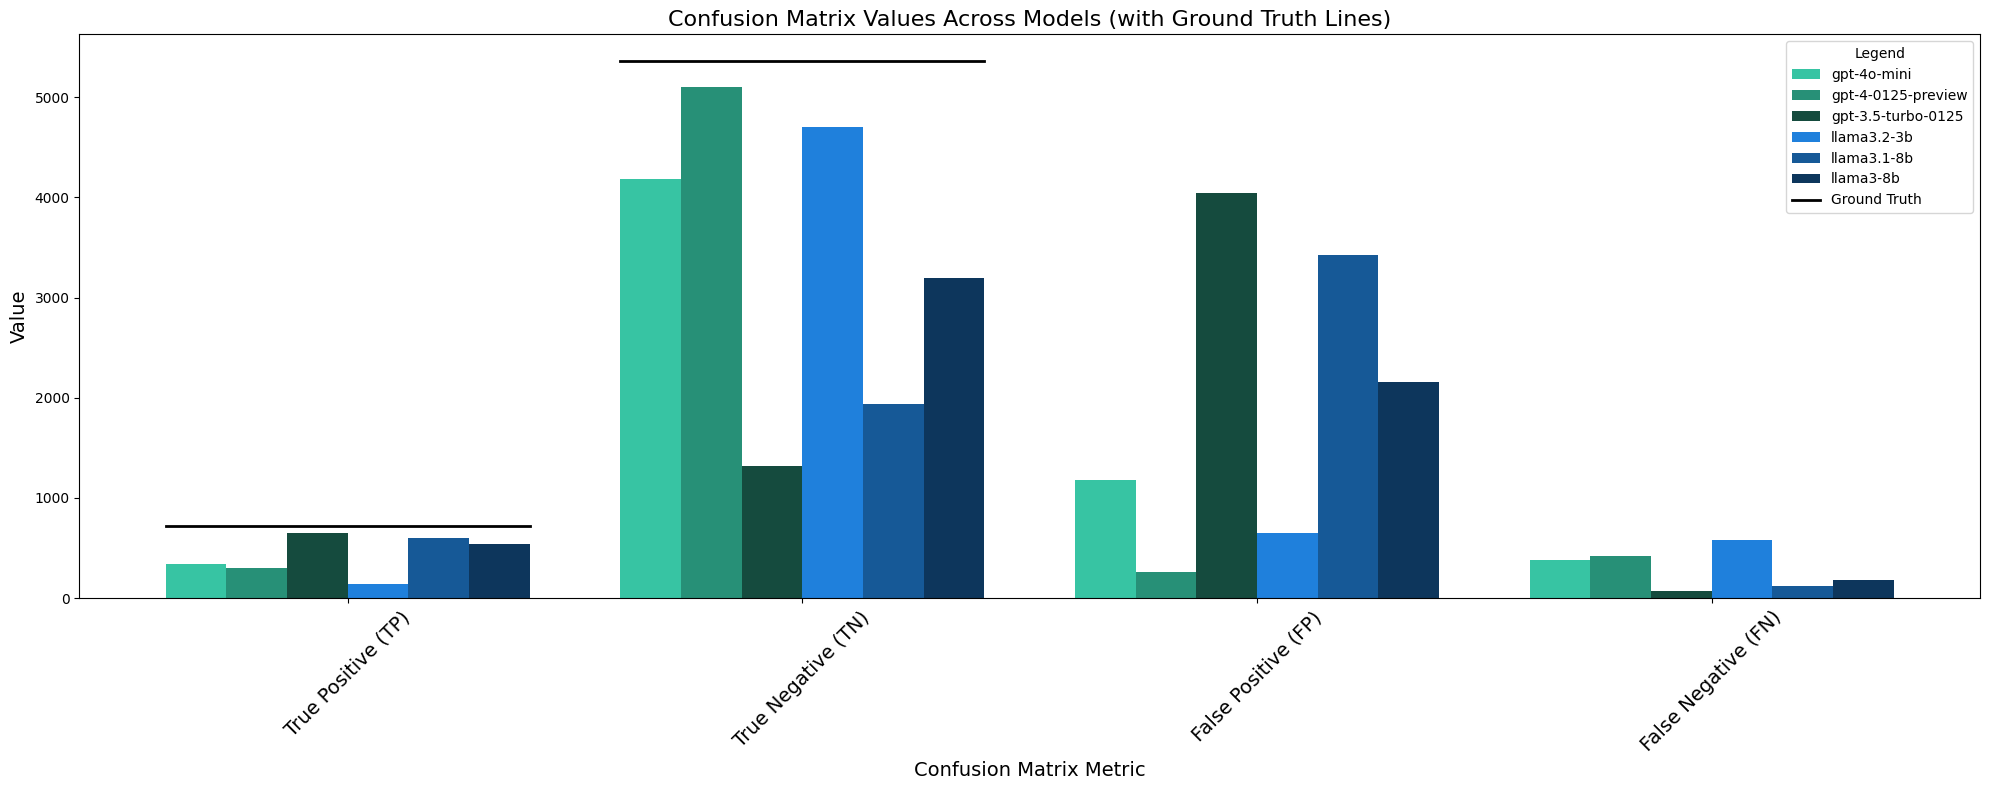

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load your CSV
df = pd.read_csv("./data/result/MASTER.csv")

# Initialize confusion values list
confusion_values = []

# Loop through LLM model columns
model_columns = ["gpt-4o-mini", "gpt-4-0125-preview", "gpt-3.5-turbo-0125", 
                 "llama3.2-3b", "llama3.1-8b", "llama3-8b"]

for model in model_columns:
    # Cast SEXISM to int
    y_true = df['SEXISM'].astype(float).astype(int)
    df[model] = pd.to_numeric(df[model], errors='coerce').fillna(0).astype(int)  # Clean model column
    y_pred = df[model]

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Append confusion matrix values
    confusion_values.append({
        "Model": model,
        "True Positive (TP)": tp,
        "True Negative (TN)": tn,
        "False Positive (FP)": fp,
        "False Negative (FN)": fn
    })

# Calculate total counts of sexist and non-sexist tweets
total_sexist = (df['SEXISM'] == 1).sum()
total_non_sexist = (df['SEXISM'] == 0).sum()

# Convert confusion values to DataFrame
confusion_df = pd.DataFrame(confusion_values)

# Melt the DataFrame for easier plotting
confusion_melted = confusion_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Define custom colors for the models
palette = {
    "gpt-4o-mini": "#1FDCB0",
    "gpt-4-0125-preview": "#16A180",
    "gpt-3.5-turbo-0125": "#0C5443",
    "llama3.2-3b": "#0081FB",
    "llama3.1-8b": "#005AAD",
    "llama3-8b": "#003669"
}

# Plot confusion matrix values
plt.figure(figsize=(20, 8))
sns.barplot(data=confusion_melted, x="Metric", y="Value", hue="Model", palette=palette)

# Define metric positions for the plot
metrics = confusion_melted["Metric"].unique()
metric_positions = {metric: i for i, metric in enumerate(metrics)}

# Add dotted lines for total counts of sexist and non-sexist tweets
for metric, total_count in [("True Positive (TP)", total_sexist), ("True Negative (TN)", total_non_sexist)]:
    if metric in metric_positions:
        i = metric_positions[metric]
        plt.plot(
            [i - 0.4, i + 0.4],  # Start and end positions on the x-axis
            [total_count, total_count],  # y-axis value for the line
            color="black" ,
            linestyle="-",
            linewidth=2,
            label=f"Ground Truth" if i == 0 else None
        )

# Customize the plot
plt.title("Confusion Matrix Values Across Models (with Ground Truth Lines)", fontsize=16)
plt.xlabel("Confusion Matrix Metric", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title="Legend", fontsize=10)
plt.tight_layout()

# Save the plot
plt.savefig("confusion_matrix_with_metric_specific_ground_truth_lines.png")

# Show the plot
plt.show()


In [2]:
# Word probabilities

import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Load dataset
df = pd.read_csv("./data/result/MASTER.csv")

# Filter sexist tweets
sexist_tweets = df[df["SEXISM"] == 1]
# print how many sexist tweets there are
print("Number of sexist tweets: ", len(sexist_tweets))
non_sexist_tweets = df[df["SEXISM"] == 0]
print("Number of non-sexist tweets: ", len(non_sexist_tweets))

# Tokenize and count words in sexist tweets
vectorizer = CountVectorizer()
X_all = vectorizer.fit_transform(df["text"])  # Fit on all data
X_sexist = vectorizer.transform(sexist_tweets["text"])  # Transform sexist tweets only

# Get word frequencies
word_freq_all = X_all.sum(axis=0).A1  # Total word counts
word_freq_sexist = X_sexist.sum(axis=0).A1  # Word counts in sexist tweets
words = vectorizer.get_feature_names_out()




# Convert to DataFrame for easier handling
word_counts = pd.DataFrame({
    "word": words,
    "sexist_count": word_freq_sexist,
    "total_count": word_freq_all
})

# Calculate probabilities
word_counts["P(sexist|word)"] = word_counts["sexist_count"] / word_counts["total_count"]
word_counts["P(word|sexist)"] = word_counts["sexist_count"] / word_freq_sexist.sum()
word_counts["P(sexist)"] = len(sexist_tweets) / len(df)
word_counts["P(word)"] = word_counts["total_count"] / word_freq_all.sum()

# Sort by highest probability of being sexist
sorted_words = word_counts.sort_values(by="P(sexist|word)", ascending=False)

# Display results
#print(sorted_words.head(50))  # Top 20 words most associated with sexist tweets

# print rows where sexist count is > 10
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)
print(sorted_words[sorted_words["sexist_count"] > 10].head(50)) 


Number of sexist tweets:  721
Number of non-sexist tweets:  5359
           word  sexist_count  total_count  P(sexist|word)  P(word|sexist)  P(sexist)   P(word)
3416   feminist            11           14        0.785714        0.001644   0.118586  0.000246
3411   feminazi            69           92        0.750000        0.010309   0.118586  0.001615
4266        her            17           24        0.708333        0.002540   0.118586  0.000421
10139     whore            11           17        0.647059        0.001644   0.118586  0.000298
5763        men            32           52        0.615385        0.004781   0.118586  0.000913
10215     women            39           64        0.609375        0.005827   0.118586  0.001123
8200        she            11           19        0.578947        0.001644   0.118586  0.000333
2282       cunt           277          491        0.564155        0.041387   0.118586  0.008618
10214     woman            16           30        0.533333        0.002